In [1]:
from main import ocel_cluster_by_objects, ocel_get_attr_def
import pm4py
from collections import Counter

from sklearn.cluster import DBSCAN, KMeans

log_path = "logs/running-example.jsonocel"
my_ocel = pm4py.read_ocel_json(log_path)

attr = ocel_get_attr_def(my_ocel)
res = ocel_cluster_by_objects(my_ocel, "products", event_assignment_mode='all', attr_def=attr)

KeyboardInterrupt: 

In [ ]:
print(res)

([Object-Centric Event Log (number of events: 1857, number of objects: 7574, number of activities: 11, number of object types: 5, events-objects relationships: 7574)
Activities occurrences: {'pick item': 1210, 'item out of stock': 250, 'reorder item': 250, 'place order': 23, 'confirm order': 23, 'pay order': 23, 'create package': 19, 'send package': 19, 'package delivered': 19, 'failed delivery': 13, 'payment reminder': 8}
Object types occurrences (number of objects): {'items': 1902, 'products': 1881, 'orders': 1864, 'customers': 1857, 'packages': 70}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects., Object-Centric Event Log (number of events: 6073, number of objects: 26958, number of activities: 11, number of object types: 5, events-objects relationships: 26958)
Activities occurrences: {'pick item': 3700, 'item out of stock': 729, 'reorder item': 729, 'place order': 202, 'confirm order': 202, 'pay order': 202, 'create packa

In [ ]:
res[0][0]

Object-Centric Event Log (number of events: 1857, number of objects: 7574, number of activities: 11, number of object types: 5, events-objects relationships: 7574)
Activities occurrences: {'pick item': 1210, 'item out of stock': 250, 'reorder item': 250, 'place order': 23, 'confirm order': 23, 'pay order': 23, 'create package': 19, 'send package': 19, 'package delivered': 19, 'failed delivery': 13, 'payment reminder': 8}
Object types occurrences (number of objects): {'items': 1902, 'products': 1881, 'orders': 1864, 'customers': 1857, 'packages': 70}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.

In [ ]:
ocels_list = res[0]
len(ocels_list)

3

In [ ]:
model = pm4py.discover_oc_petri_net(ocels_list[0])
pm4py.view_ocpn(model)

In [ ]:
print(res[1])

[[0.         0.67746942 0.85270562 0.80181283 0.8226233  0.7116305
  0.5884362  0.88224379 0.37404806 0.91020532 0.69777434 0.44866712
  0.44235639 0.48657135 0.40021061 0.36107209 0.69105624 0.81193215
  0.340669   0.68613125]
 [0.67746942 0.         0.54497642 0.49529192 0.84928468 0.40541165
  0.94692057 0.57526976 0.68570416 0.6032313  0.67579503 0.81273977
  0.80265317 0.84807641 0.76126257 0.67091577 0.66862382 0.50616641
  0.7027782  0.38217792]
 [0.85270562 0.54497642 0.         0.36217507 0.65853723 0.428796
  0.74282921 0.37374599 0.90822174 0.3980827  0.90269261 0.73148148
  0.73703704 0.66095378 0.7563766  0.89902163 0.89265175 0.36776335
  0.81380372 0.47136216]
 [0.80181283 0.49529192 0.36217507 0.         0.66270746 0.3717108
  0.76245784 0.38627599 0.85687585 0.41514373 0.84832603 0.68391146
  0.68735253 0.66044194 0.70125485 0.8426916  0.84130586 0.31928712
  0.75853094 0.41971421]
 [0.8226233  0.84928468 0.65853723 0.66270746 0.         0.7210215
  0.72714805 0.686111

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

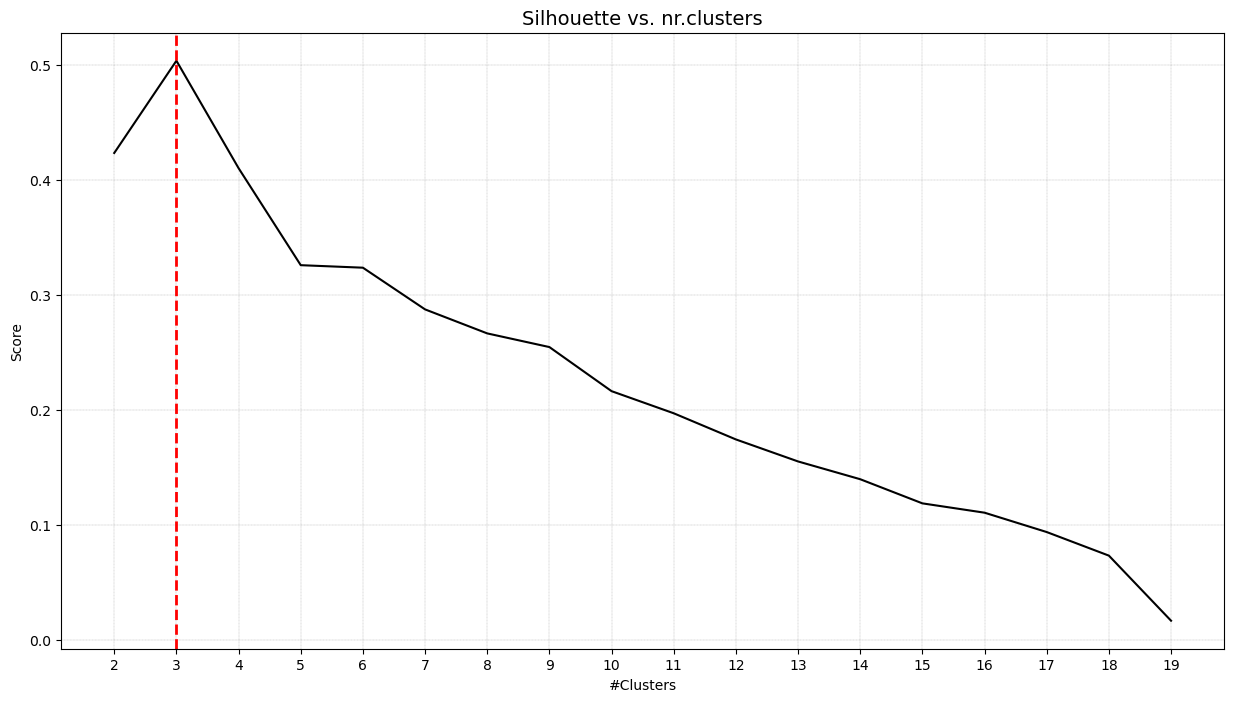

In [ ]:
res[2].plot()

In [ ]:
pm4py.objects.ocel.exporter.jsonocel.exporter.apply(ocels_list[0], 'logs/running-example_cluster1.jsonocel')

In [ ]:
pm4py.objects.ocel.exporter.jsonocel.exporter.apply(ocels_list[1], 'logs/running-example_cluster2.jsonocel')

In [ ]:
pm4py.objects.ocel.exporter.jsonocel.exporter.apply(ocels_list[2], 'logs/running-example_cluster3.jsonocel')

In [ ]:
import pm4py
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

log_path = "logs/running-example_cluster1.jsonocel"
ocel = pm4py.read_ocel_json(log_path)

def show_basic_information(log_path):
    ocel_ = pm4py.read_ocel_json(log_path)    
    events_number = len(ocel_.relations['ocel:eid'].drop_duplicates().values.tolist())
    objects_number = len(ocel_.relations['ocel:oid'].drop_duplicates().values.tolist())
    object_types = pm4py.ocel_get_object_types(ocel)

    print(f"Your log includes: \n- {events_number} different events")
    print(f"- {objects_number} different objects")
    
    # Object Types
    df = ocel.relations
    numbers = []
    for category in object_types:
        objects_number = len(df[(df['ocel:type'] == category)]['ocel:oid'].drop_duplicates().values.tolist())
        numbers.append(objects_number)
        
    ocel_ = ocel.relations['ocel:type'].drop_duplicates().values.tolist()
    df = pd.DataFrame()
    df["Object category"] = ocel_
    df['Number'] = numbers
    print("\n")
    print(df.reset_index(drop=True).head())

    # Events types
    df_activities = pd.DataFrame()
    ocel_ = pm4py.read_ocel_json(log_path)
    for category in object_types:
        ocel2 = pm4py.ocel_object_type_activities(ocel_)[category]
        df_ocel_ = pd.DataFrame(ocel2)
        df_activities[f"Activities - {category}"] = df_ocel_
        
    print("\n")
    print(df_activities.reset_index(drop=True).head())
    print("\n")

In [ ]:
show_basic_information('logs/running-example_cluster1.jsonocel')

Your log includes: 
- 1857 different events
- 2156 different objects


  Object category  Number
0          orders     907
1           items    1210
2        products       3
3       customers      17
4        packages      19


  Activities - orders Activities - items Activities - products  \
0       confirm order      confirm order         confirm order   
1      create package     create package        create package   
2    payment reminder   payment reminder      payment reminder   
3   item out of stock  item out of stock     item out of stock   
4           pick item          pick item             pick item   

  Activities - customers Activities - packages  
0          confirm order       failed delivery  
1         create package        create package  
2       payment reminder          send package  
3      item out of stock     package delivered  
4              pick item                   NaN  




In [ ]:
show_basic_information('logs/running-example_cluster2.jsonocel')

Your log includes: 
- 6073 different events
- 5514 different objects


  Object category  Number
0          orders     907
1           items    1210
2        products       3
3       customers      17
4        packages      19


  Activities - orders Activities - items Activities - products  \
0       confirm order      confirm order         confirm order   
1      create package     create package        create package   
2    payment reminder   payment reminder      payment reminder   
3   item out of stock  item out of stock     item out of stock   
4           pick item          pick item             pick item   

  Activities - customers Activities - packages  
0          confirm order       failed delivery  
1         create package        create package  
2       payment reminder          send package  
3      item out of stock     package delivered  
4              pick item                   NaN  




In [ ]:
show_basic_information('logs/running-example_cluster3.jsonocel')

Your log includes: 
- 5283 different events
- 4952 different objects


  Object category  Number
0          orders     907
1           items    1210
2        products       3
3       customers      17
4        packages      19


  Activities - orders Activities - items Activities - products  \
0       confirm order      confirm order         confirm order   
1      create package     create package        create package   
2    payment reminder   payment reminder      payment reminder   
3   item out of stock  item out of stock     item out of stock   
4           pick item          pick item             pick item   

  Activities - customers Activities - packages  
0          confirm order       failed delivery  
1         create package        create package  
2       payment reminder          send package  
3      item out of stock     package delivered  
4              pick item                   NaN  




In [ ]:
show_basic_information('logs/running-example.jsonocel')

Your log includes: 
- 22367 different events
- 11521 different objects


  Object category  Number
0          orders     907
1           items    1210
2        products       3
3       customers      17
4        packages      19


  Activities - orders Activities - items Activities - products  \
0       confirm order      confirm order         confirm order   
1      create package     create package        create package   
2    payment reminder   payment reminder      payment reminder   
3   item out of stock  item out of stock     item out of stock   
4           pick item          pick item             pick item   

  Activities - customers Activities - packages  
0          confirm order       failed delivery  
1         create package        create package  
2       payment reminder          send package  
3      item out of stock     package delivered  
4              pick item                   NaN  


